# Consumer complaint project

Our objective is to use consumer complaint dataset released by Consumer Financial Protection Bureau (CFPB) to classify complaints to different issues We specifically focus on mortgage complaints in this project. Roughly 35 percent of customers provided consent to release their complaint narrative. These complaints can provide other customers and companies meaningful information such as: issues occuring in certain company, how a company treats their customers and what and when an issue is likely to occur. 

### 1) Load in, manipulate and export final dataset

#### 1.1) Prepare environment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("complaints.csv") # read in data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 1.2) Preview and manipulate the data

In [ ]:
list(data.columns) # get column names

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

In [ ]:
data.head(5) # get an overview of df 

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-05-10,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,NY,11746.0,NaN,NaN,Referral,2022-05-11,Closed with explanation,Yes,NaN,5552549
1,2022-05-05,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",WV,25504.0,NaN,NaN,Web,2022-05-05,In progress,Yes,NaN,5546454
2,2022-05-05,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32792.0,NaN,Consent not provided,Web,2022-05-05,Closed with explanation,Yes,NaN,5543106
3,2022-04-19,Credit card or prepaid card,General-purpose credit card or charge card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,NaN,NaN,"Bread Financial Holdings, Inc.",FL,34787.0,NaN,NaN,Web,2022-05-05,Closed with monetary relief,Yes,NaN,5464187
4,2022-05-05,Debt collection,Auto debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,NCB Management Services Inc.,TX,78503.0,NaN,NaN,Web,2022-05-05,Closed with explanation,Yes,NaN,5544809


In [ ]:
data.shape # get dimension of df

(2682094, 18)

In [ ]:
# find number of missing values and percentage
def missing_value(df=data):
    total = df.isnull().sum()
    pct = df.isnull().sum() * 100 / df.shape[0]
    missing = pd.concat([total, round(pct, 1)], axis=1, keys=['Total', 'Percentage'])
    return missing.sort_values(by='Percentage', ascending=False)

missing_value()

,Total,Percentage
Tags,2368098,88.3
Consumer disputed?,1913636,71.3
Consumer complaint narrative,1744298,65.0
Company public response,1563346,58.3
Consumer consent provided?,782815,29.2
Sub-issue,660460,24.6
Sub-product,235163,8.8
ZIP code,40003,1.5
State,39743,1.5
Date sent to company,0,0.0


In [ ]:
# get number of unique values in each column 
def total_unique_values(df=data):
    cols = pd.Series(df.columns.values)
    len_unique = pd.Series([len(df[i].unique()) for i in df.columns.values])
    unique = pd.concat([cols, len_unique], axis=1, keys=['Column', 'Total Unique Values'])
    return unique.sort_values(by='Total Unique Values', ascending=False)

total_unique_values()

,Column,Total Unique Values
17,Complaint ID,2682094
5,Consumer complaint narrative,831261
9,ZIP code,58907
7,Company,6379
0,Date received,3822
13,Date sent to company,3771
4,Sub-issue,222
3,Issue,165
2,Sub-product,77
8,State,64


In [ ]:
# subset df to rows that has complaint text
data_complaints = data.dropna(subset=['Consumer complaint narrative'])

In [ ]:
data_complaints.shape # get dimension of subsetted df

(937796, 18)

In [ ]:
sorted(data_complaints['Product'].unique()) # get unique values for product

['Bank account or service',
 'Checking or savings account',
 'Consumer Loan',
 'Credit card',
 'Credit card or prepaid card',
 'Credit reporting',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Money transfer, virtual currency, or money service',
 'Money transfers',
 'Mortgage',
 'Other financial service',
 'Payday loan',
 'Payday loan, title loan, or personal loan',
 'Prepaid card',
 'Student loan',
 'Vehicle loan or lease',
 'Virtual currency']

In [ ]:
# subset df to only mortgage loans
mortgage_data = data_complaints[data_complaints.Product == "Mortgage"] 

In [ ]:
mortgage_data.shape # get dimension of final df

(91774, 18)

#### 1.3) Analyze duplicated texts

In [ ]:
duplicate_text = mortgage_data[mortgage_data.duplicated(['Consumer complaint narrative'])]

In [ ]:
duplicate_text.shape

In [ ]:
duplicate_text

There are 130 duplicate text that go with different companies and issues. We agree that it is best to remove these duplicated texts to not introduce further noise in our data.

In [ ]:
mortgage_data = mortgage_data.drop_duplicates(subset="Consumer complaint narrative")

In [ ]:
mortgage_data.shape

(91644, 18)

#### 1.4) Export final data

In [ ]:
# mortgage_data.to_csv('mortgage_complaints.csv', index = False)

### 2) EDA

#### 2.1) Total complaints per company (in percentage)

Text(0.5, 1.0, 'Percentage of complaints per company (Top 30)')

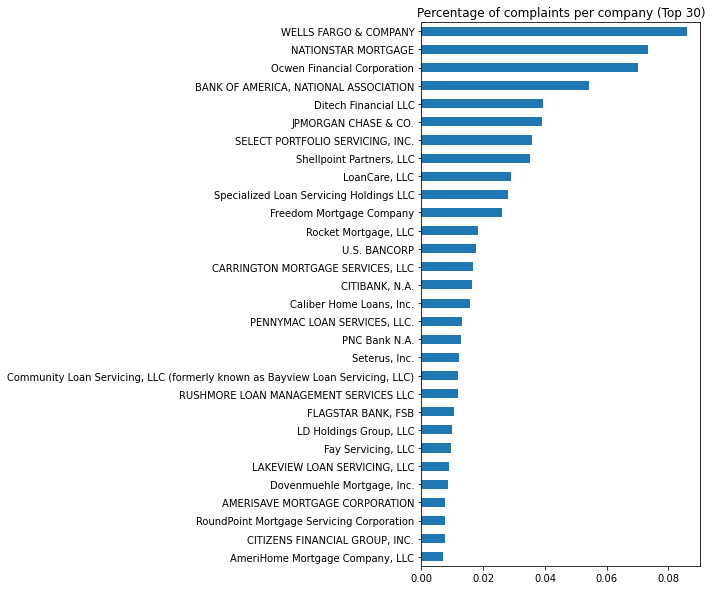

In [ ]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
mortgage_data['Company'].value_counts(normalize=True).sort_values(ascending=True)[-30:].plot(ax=ax, kind='barh')
ax.set_title('Percentage of complaints per company (Top 30)')

#### 2.2) Total complaints per sub-product (in percentage)

Text(0.5, 1.0, 'Percentage of complaints per sub-product')

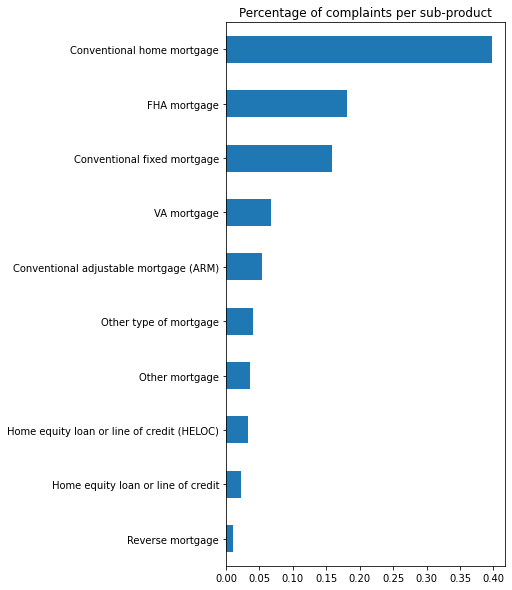

In [ ]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
mortgage_data['Sub-product'].value_counts(normalize=True).sort_values(ascending=True).plot(ax=ax, kind='barh')
ax.set_title('Percentage of complaints per sub-product')

#### 2.3) Company responses (in percentage)

Text(0.5, 1.0, 'Percentage of company public response')

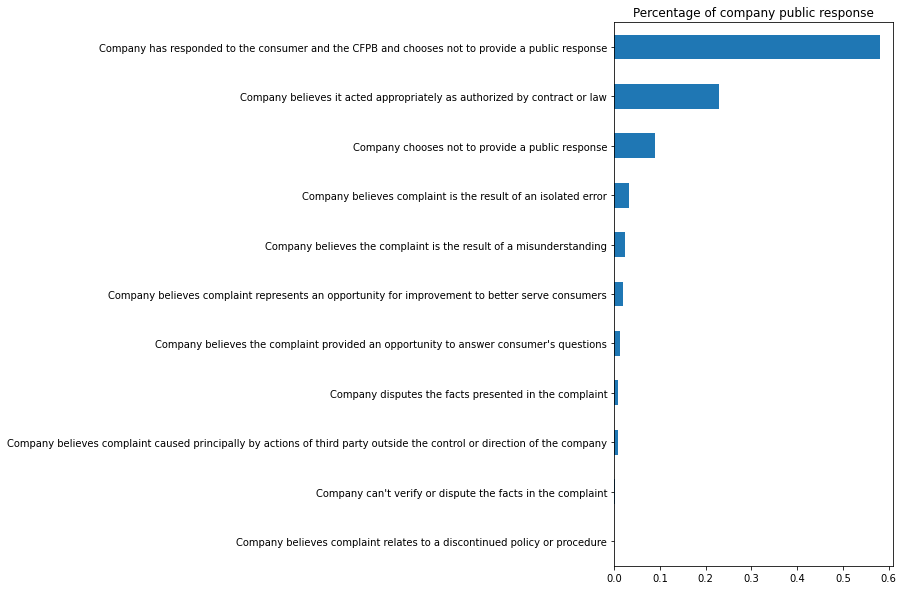

In [ ]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
mortgage_data['Company public response'].value_counts(normalize=True).sort_values(ascending=True).plot(ax=ax, kind='barh')
ax.set_title('Percentage of company public response')

Text(0.5, 1.0, 'Percentage of company response to consumer')

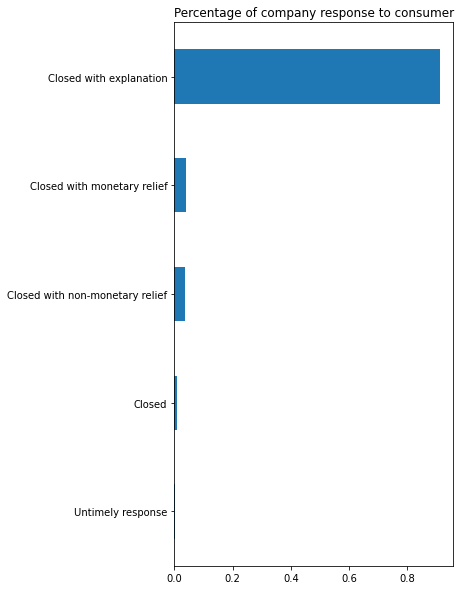

In [ ]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
mortgage_data['Company response to consumer'].value_counts(normalize=True).sort_values(ascending=True).plot(ax=ax, kind='barh')
ax.set_title('Percentage of company response to consumer')

#### 2.4) Complaint issue (in percentage)

Text(0.5, 1.0, 'Percentage of complaint issues')

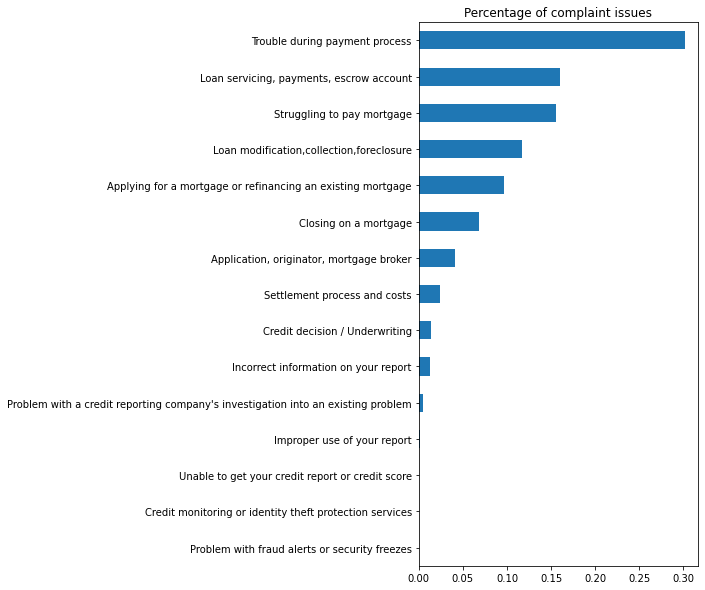

In [ ]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
mortgage_data['Issue'].value_counts(normalize=True).sort_values(ascending=True).plot(ax=ax, kind='barh')
ax.set_title('Percentage of complaint issues')

#### 2.5) Complaint length distribution

We have very left skew in length of complaints. The median length is 1187 and mean is 1643. The We expect 75 percent of the documents to have less than 2067 words. 

In [ ]:
mortgage_data['Consumer complaint narrative'].apply(len).describe()

count    91644.000000
mean      1643.155864
std       1674.627956
min         13.000000
25%        677.000000
50%       1187.000000
75%       2067.000000
max      32317.000000
Name: Consumer complaint narrative, dtype: float64

In [ ]:
mortgage_data['Consumer complaint narrative'].apply(len).median()

1187.0

(0.0, 10000.0)

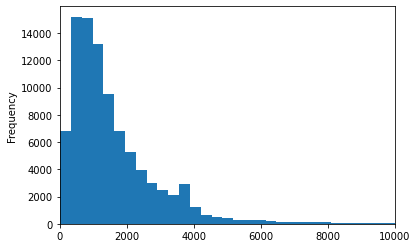

In [ ]:
mortgage_data['Consumer complaint narrative'].apply(len).plot(kind = 'hist', bins=100).set_xlim(0,10000) # x-lim cut off 10,000

### 3) Apply classification models